<a href="https://colab.research.google.com/github/Inna-Grynishak/Inna-Grynishak/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №4
студентки КН-31 **Гринішак Інни**\
**Тема**: Neural Network Classification with TensorFlow\
\
**Завдання:** \
1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab4).
7. Підготуватися до захисту лабораторної роботи (пояснення коду, відповіді на запитання за темою)
- Варіант 5   image.png



# Завдання 1
На основі документу вирішити завдання класифікації для набору даних Fashion MNIST(спочатку витягнемо дані).

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


# Завдання 2
Для моделювання використати 3 класи індекси яких взяти відповідно до 5-го варіанту(3 класи: 4, 7, 1)



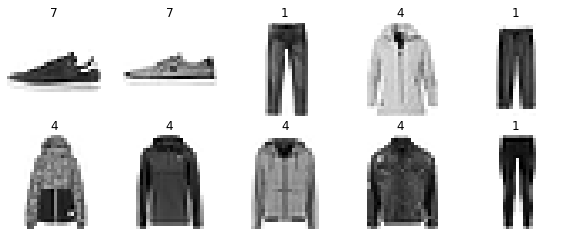

In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt

class_names = ['Coat','Sneaker','Trouser']
my_train_data = []
my_train_labels = []
for i in range(len(train_labels)):
  if (train_labels[i] in [4,7,1]):
    my_train_data.append(train_data[i])
    my_train_labels.append(train_labels[i])

my_test_data=[]
my_test_labels  = []
for i in range(len(test_labels)):
  if (test_labels[i] in [4,7,1]):
    my_test_data.append(test_data[i])
    my_test_labels.append(test_labels[i])

# Plot my random images of fashion MNIST
plt.figure(figsize=(10, 10))
for i in range(10):
  ax = plt.subplot(5, 5, i + 1)
  rand_index = random.choice(range(len(my_train_data)))
  plt.imshow(my_train_data[i], cmap=plt.cm.binary)
  plt.title(my_train_labels[i])
  plt.axis(False)


# Завдання 3
Моделювання провести із використанням нейронної мережі (Flatten & Dense layers)

In [44]:
# Divide train and test images by the maximum value (normalize it)
my_train_data = np.array(my_train_data) / 255.0
my_train_labels = np.array(my_train_labels)
my_test_data= np.array(my_test_data) / 255.0
my_test_labels  = np.array(my_test_labels)

# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/200))

# Fit the model
find_lr_history = model_13.fit(my_train_data,
                               my_train_labels,
                               epochs=40,
                               validation_data=(my_test_data, my_test_labels),
                               callbacks=[lr_scheduler])




Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 3ms/step - loss: 1.5534 - accuracy: 0.3554 - val_loss: 0.9949 - val_accuracy: 0.5840 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.7929 - accuracy: 0.7977 - val_loss: 0.5937 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3873 - accuracy: 0.9682 - val_loss: 0.2229 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.9775 - val_loss: 0.1187 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9807 - val_loss: 0.0846 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9833 - val_loss: 0.0656 - val_accuracy: 0.9830 - lr: 0.0011
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0584 

# Завдання 4 (1)
Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate)

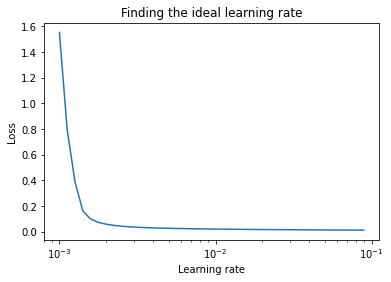

In [45]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [46]:
# Let's refit a model using the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.07),
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(my_train_data,
                       my_train_labels,
                       epochs=20,
                       validation_data=(my_test_data, my_test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.1033 - accuracy: 0.9616 - val_loss: 0.0205 - val_accuracy: 0.9940
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0196 - val_accuracy: 0.9953
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0199 - val_accuracy: 0.9937
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0164 - val_accuracy: 0.9960
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0212 - val_accuracy: 0.9957
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0257 - val_accuracy: 0.9933
Epoch 8/20
563/56

# Завдання 4 (2)
Здійснити побудову Confusion Matrix

94/94 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9943


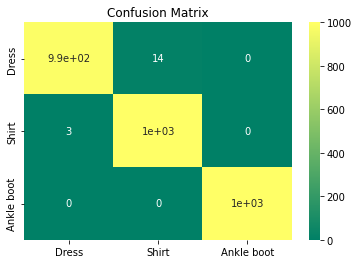

In [52]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

test_loss, test_acc = model_13.evaluate(my_test_data, my_test_labels)


predictions = model_13.predict(my_test_data)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)

cm = confusion_matrix(my_test_labels, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

sns.heatmap(dataframe_cm, annot=True, cmap="summer")
plt.title('Confusion Matrix')


plt.show()

# Висновок
В ході лабораторної роботи було вивчено особливості задачі класифікації.